In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

In [2]:
from core.utils.preprocessing import df_to_xy
#fix rnd seed
np.random.seed(0)

MAX_GAIN = 200

# Read and sanitize the data
df = pd.read_excel("../data/t00/UG_HH_NEW_continuous_no200.xls")

# display(df.head())
# df.hist()
df.head()

,prop,other_resp,other_prop,time_spent_risk,cells,selfish,time_spent_prop,count_effort,Honesty_Humility,Extraversion,Agreeableness,min_offer
0,50,50,50,43000,26,60,31000,20,4.2,3.0,2.8,50
1,50,20,20,12000,7,20,38000,20,1.9,4.4,2.9,50
2,120,50,80,88000,50,20,69000,12,3.3,3.8,3.4,80
3,50,50,50,24000,50,60,26000,14,3.6,3.8,2.6,50
4,100,50,50,137000,24,60,43000,4,3.6,2.5,2.7,100


In [3]:
from sklearn.linear_model import LinearRegression
from core.utils.preprocessing import df_to_xy

x, y = df_to_xy(df, drop_columns=["prop", "other_resp", "other_prop"])
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 2/5, random_state = 0)



In [4]:
from core.utils.data_augmentation import DACombine

In [5]:
from core.models.deep import loss_tf, gain_tf, KerasModel

Using TensorFlow backend.


**Metrics**

In [6]:
from core.models.metrics import avg_gain_ratio, gain_mean, avg_loss_ratio

**AcceptanceModel**

In [7]:
from core.models import AcceptanceModel

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


gain_mean:  81.31944444444444
gain ratio:  0.6972076523220687


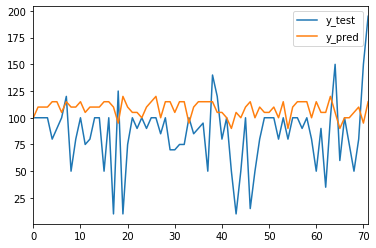

In [8]:
from sklearn.ensemble.bagging import BaggingRegressor, BaggingClassifier, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import NuSVC, SVC, LinearSVC, LinearSVR, SVR, NuSVR

#LinearSVR, zero_one=True: 87
#SVR, zero_one=True: 70

model = AcceptanceModel(LinearSVR(loss='epsilon_insensitive', ), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yTrain_[yTrain_ < 50] = 50

yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  78.95833333333333
gain ratio:  0.6783561154213328


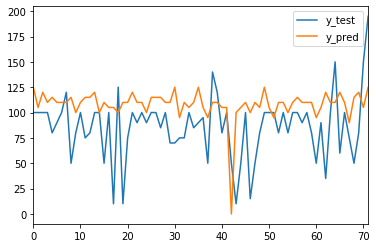

In [9]:
model = AcceptanceModel(SVR(gamma="auto"), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


gain_mean:  70.83333333333333
gain ratio:  0.5757583038747227


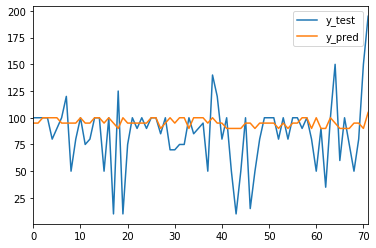

In [10]:
model = AcceptanceModel(LinearSVC(loss='epsilon_insensitive'), step=5, zero_one=True)
#model = AcceptanceModel(KerasModel(epochs=300), zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  2.013888888888889
gain ratio:  0.013425925925925926


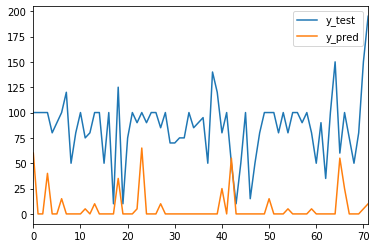

In [11]:
model = AcceptanceModel(PassiveAggressiveClassifier(), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  76.54166666666667
gain ratio:  0.6545683975829858


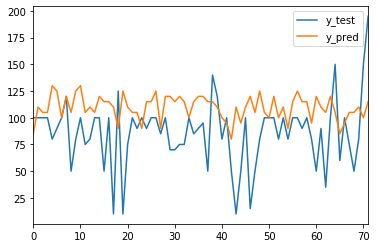

In [12]:
model = AcceptanceModel(LogisticRegression(solver='lbfgs'), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
da = DACombine()
xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=15, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  83.75
gain ratio:  0.7192243836809054


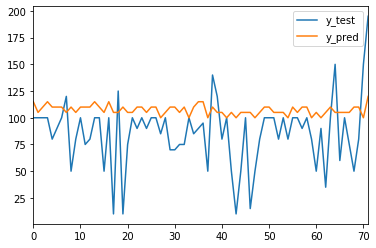

In [13]:
model = AcceptanceModel(LinearRegression(), step=5, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

/home/franck/anaconda3/envs/thesis/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


gain_mean:  66.66666666666667
gain ratio:  0.5480686504141882


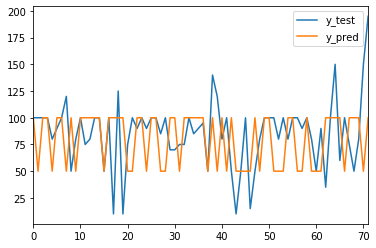

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='saga', multi_class='ovr')
model.fit(xTrain_, yTrain_.ravel())

yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

In [15]:
from core.utils.data_augmentation import DASampling

gxTrain, gyTrain = DASampling().generate_data(xTrain, yTrain, size=10000)

gain_mean:  34.861111111111114
gain ratio:  0.2341887710308763


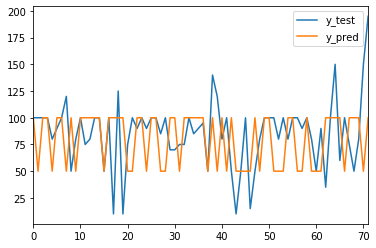

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#model = MLPClassifier(hidden_layer_sizes=(1000,), )
model = PassiveAggressiveClassifier(max_iter=1000, tol=1e-4)
model.fit(gxTrain, gyTrain.ravel())

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))

gain_mean:  84.79166666666667
gain ratio:  0.7225935216924919


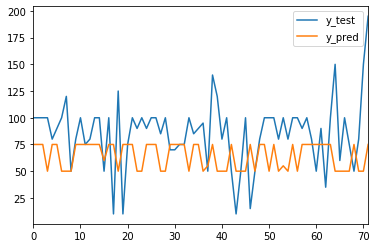

In [17]:
for _ in range(200):
    model.partial_fit(xTrain, yTrain.ravel())

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean(yTest.ravel(), yPred.ravel()))
print("gain ratio: ", avg_gain_ratio(yTest.ravel(), yPred.ravel()))